<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Connect to Db2 database on Cloud using Python


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Import the ibm_db Python library
* Enter the database connection credentials
* Create the database connection
* Close the database connection


## Crear credenciales para acceder a tu instancia de base de datos

Objetivo(s)
Al final de este laboratorio, podrás:

- Crear tu propia instancia de base de datos en IBM Cloud utilizando el servicio DB2.

## Ejercicio
Se requieren credenciales de la base de datos para conectarse desde aplicaciones remotas como los cuadernos de Jupyter que se utilizan en los laboratorios y tareas en las últimas dos semanas del curso.

1. Ve a tu panel de recursos de IBM Cloud (o haz clic en IBM Cloud en la esquina superior izquierda):

https://cloud.ibm.com/resources

> Nota: puede que necesites iniciar sesión en IBM Cloud mientras cargas los recursos/panel.

Si tu conexión es lenta, puede tardar más de 30 segundos en cargar completamente el panel.

1. Localiza y haz clic en tu servicio de Db2 listado bajo Servicios.

> (NOTA: En el ejemplo a continuación, el servicio se llama Db2-f7. Tu servicio de Db2 puede tener letras/números diferentes en el sufijo, por ejemplo, Db2-f8, Db-50, etc.)

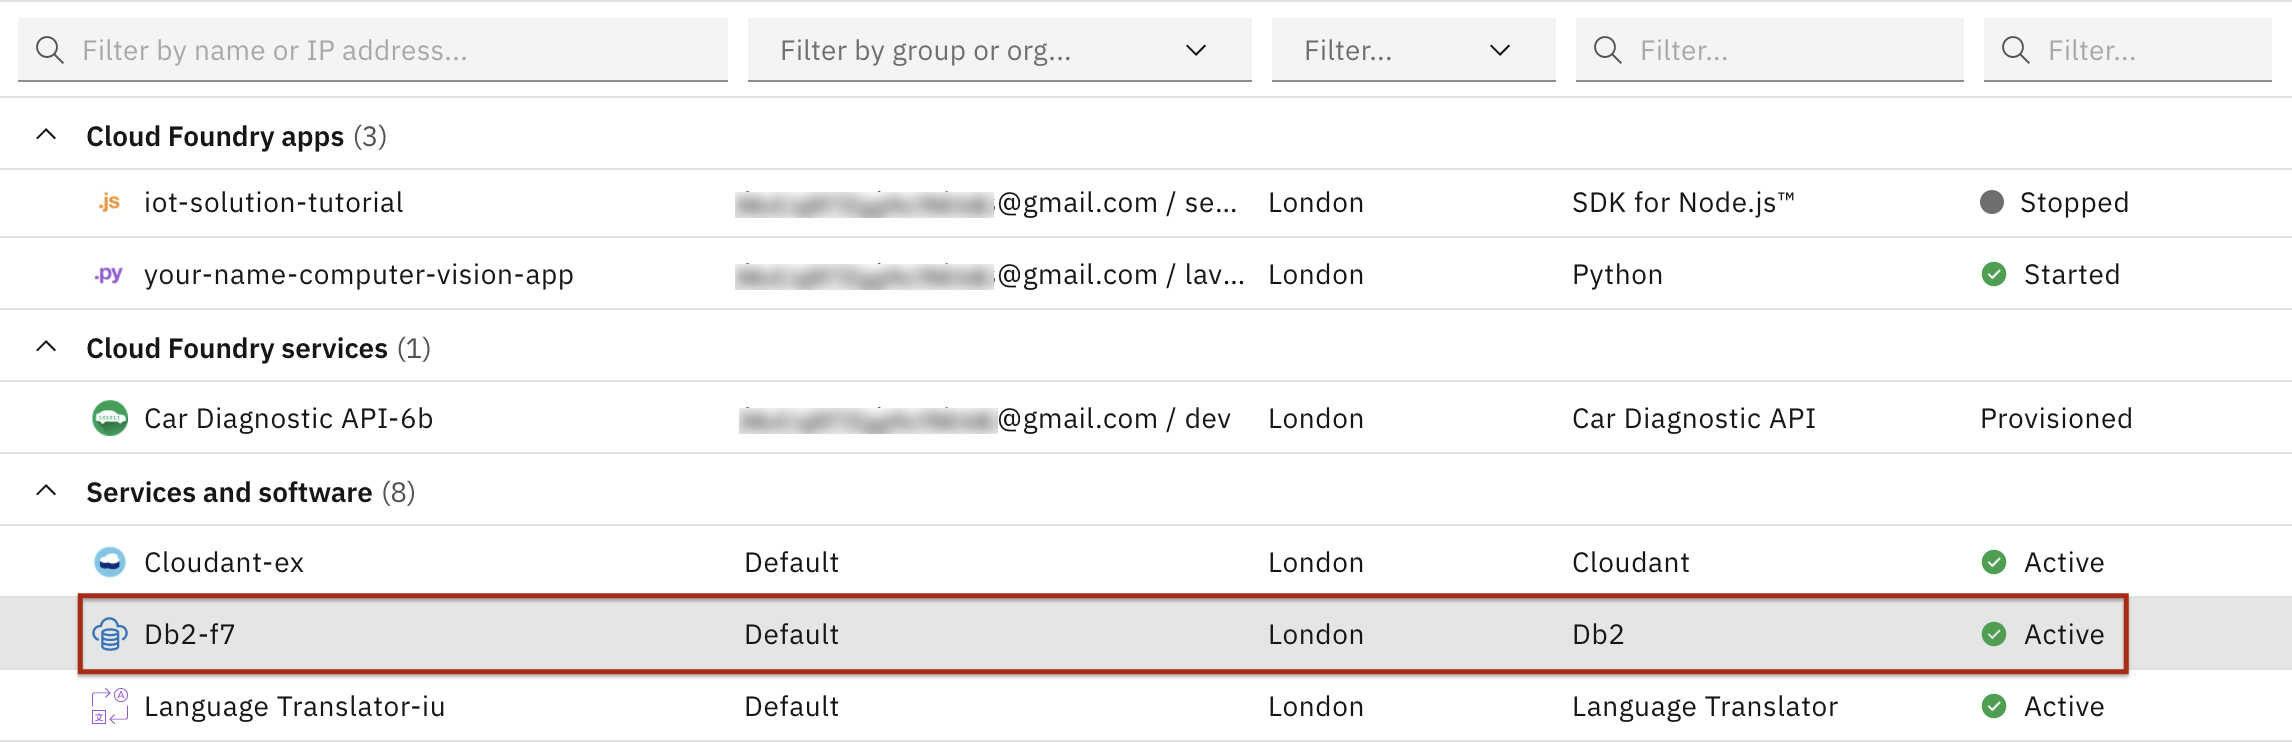

2. Haz clic en Credenciales del servicio en el menú de la izquierda

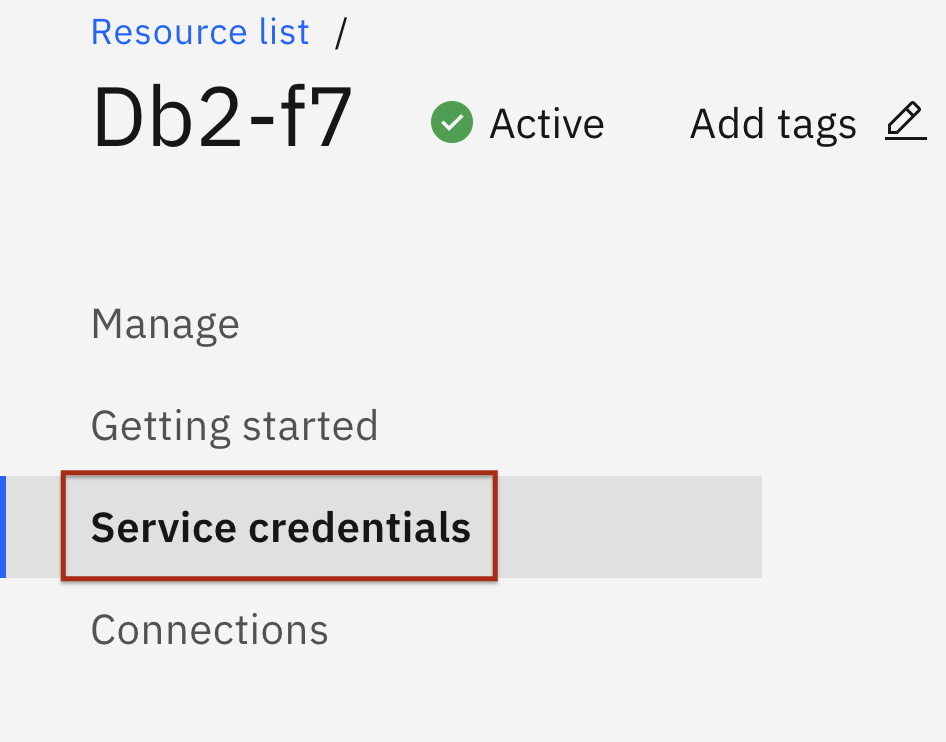

3. Haz clic en el botón para crear Nueva credencial

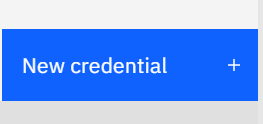

En el aviso que aparece, haz clic en el botón Agregar en la parte inferior derecha:

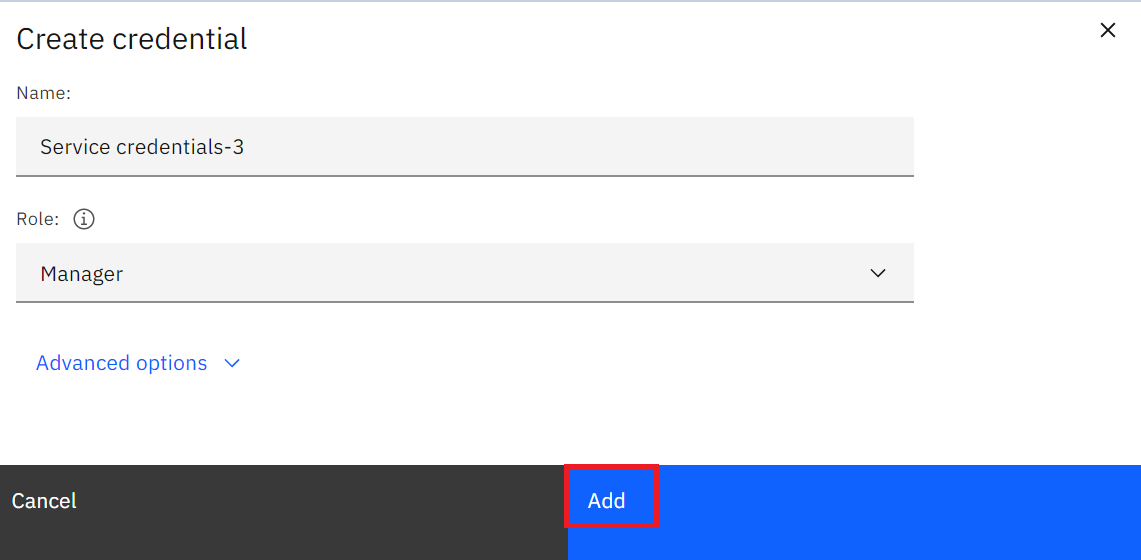

4. Marca la casilla para Ver credenciales
5. Copia y guarda las credenciales tomando nota de lo siguiente:
- **port** es el puerto de la base de datos
- **db** es el nombre de la base de datos
- **host** es el nombre del host de la instancia de la base de datos
- **username** es el nombre de usuario que usarás para conectarte
- **password** es la contraseña que usarás para conectarte

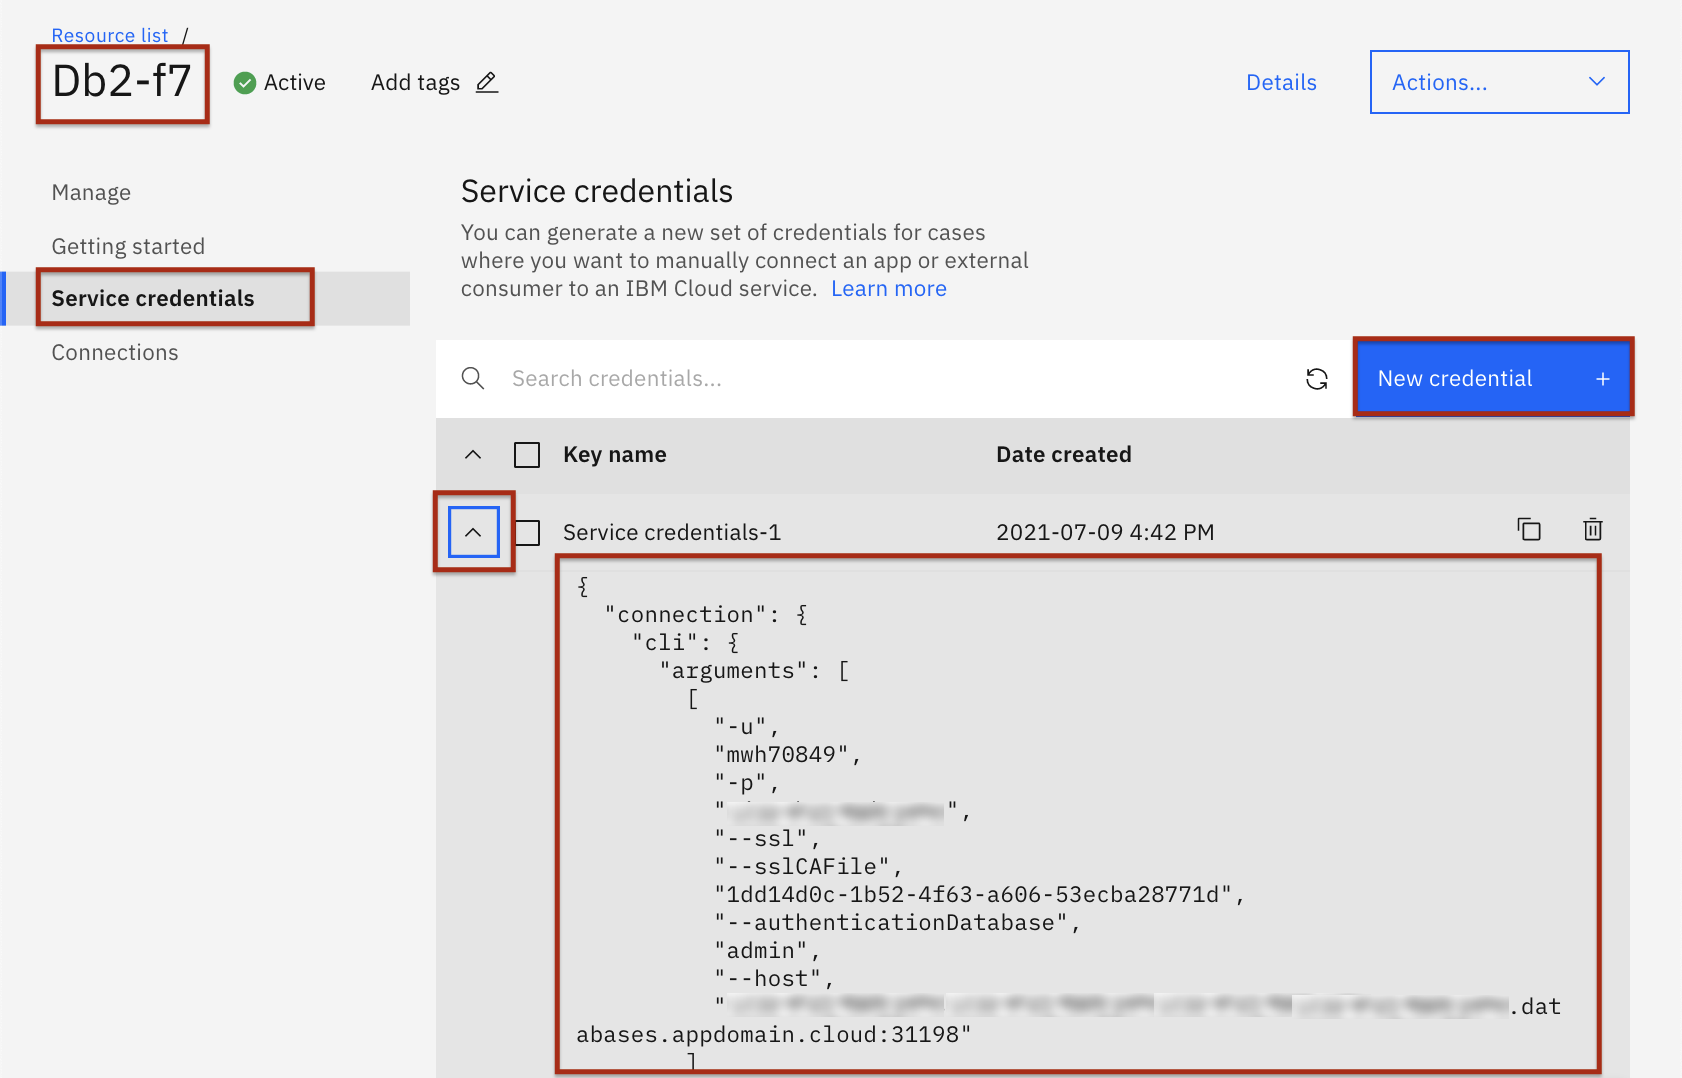

Necesitas desplazarte hacia abajo para obtener los detalles de las credenciales.

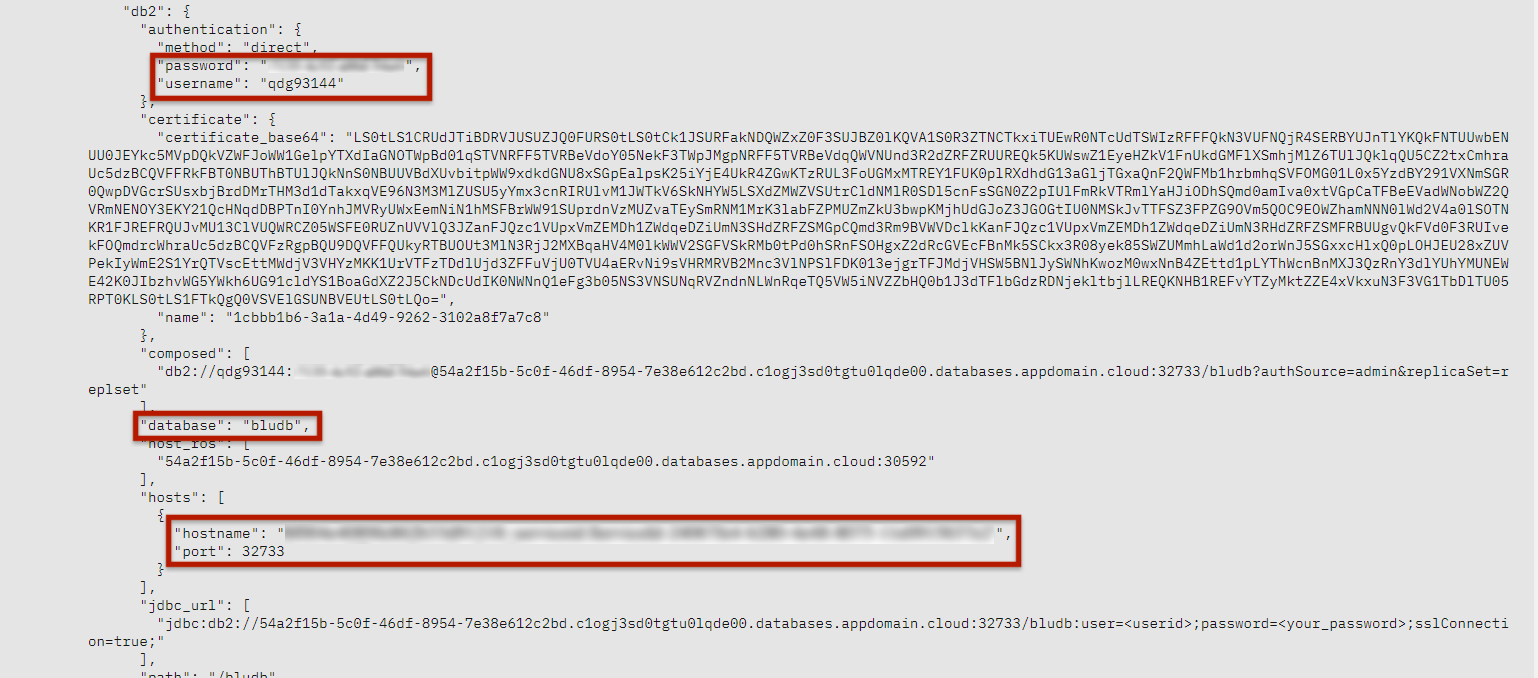


__Note:__ Please follow the instructions given in the first Lab of this course to Create a database service instance of Db2 on Cloud and retrieve your database Service Credentials.

## Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.


We first import the ibm_db library into our Python Application

Execute the following cells by clicking within it and then 
press `Shift` and `Enter` keys simultaneously

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you may need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


> These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
``!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3``
> Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
``!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24``
``!pip install ipython-sql``

In [ ]:
#pip install ibm_db

In [ ]:
#pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3

In [ ]:
#pip install sqlalchemy==1.3.24

In [6]:
#pip install --force-reinstall ibm_db ibm_db_sa

In [ ]:
#pip install ibm_db

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import ibm_db

ImportError: DLL load failed while importing ibm_db: No se puede encontrar el módulo especificado.

When the command above completes, the `ibm_db` library is loaded in your notebook. 


## Identify the database connection credentials

Connecting to dashDB or DB2 database requires the following information:
* Driver Name
* Database name 
* Host DNS name or IP address 
* Host port
* Connection protocol
* User ID (or username)
* User Password



__Notice:__ To obtain credentials please refer to the instructions given in the first Lab of this course

Now enter your database credentials below and execute the cell with `Shift` + `Enter`


In [ ]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "YourDb2Hostname" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "YourDb2Username"        # e.g. "abc12345"
dsn_pwd = "YoueDb2Password"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "YourPort"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

## Create the DB2 database connection

Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.


Lets build the dsn connection string using the credentials you entered above


In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

Now establish the connection to the database


In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Congratulations if you were able to connect successfuly. Otherwise check the error and try again.


In [ ]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

In [ ]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

## Close the Connection
We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


In [ ]:
ibm_db.close(conn)

## Summary

In this tutorial you established a connection to a DB2 database on Cloud database from a Python notebook using ibm_db API. 


## Author

<a href="https://www.linkedin.com/in/ravahuja">Rav Ahuja</a>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```{toggle} ## Change Log
```


```{toggle}|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
```
```{toggle}|---|---|---|---|
```
```{toggle}| 2021-11-17  | 2.2  | Lakshmi  | Updated library  |
```
```{toggle}| 2021-07-09  | 2.1  | Malika   | Updated the connection string  |
```
```{toggle}| 2020-08-28  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |
```
